# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np

In [261]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    x_log = []
    k_log = []

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        x_log.append(x)
        E = (I - (K @ H)) @ E
    
    print(E)
    return x_log, k_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [262]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0, 0, 1000, 1000])

# next state function: 4D
# x_t = x_t-1 + dt * vx_t-1
# y_t = y_t-1 + dt * vy_t-1
# vx_t = vx_t-1
# vy_t = vy_t-1
F = np.eye(4) + np.eye(4, k=2) * dt

# measurement function: reflect the fact that we observe x and y but not the two velocities
# H @ pos = (x, y, 0, 0)^T
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.eye(2) * 0.1

# 4D identity matrix
I = np.eye(4)

## First experiment

In [263]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [264]:
x_log, k_log = kalman_filter(x, E)
xt = [x[0] for x in x_log]
yt = [x[1] for x in x_log]
vxt = [x[2] for x in x_log]
vyt = [x[3] for x in x_log]
k00t = [k[0][0] for k in k_log]
k11t = [k[1][1] for k in k_log]
k20t = [k[2][0] for k in k_log]
k31t = [k[3][1] for k in k_log]

[[0.03955609 0.         0.06592682 0.        ]
 [0.         0.03955609 0.         0.06592682]
 [0.06592682 0.         0.10987804 0.        ]
 [0.         0.06592682 0.         0.10987804]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [265]:
import matplotlib as mpl
import matplotlib.pyplot as plt

figsize = (8,4)
legend_fontsize = 16

def log(xt, yt, xlabel, ylabel, color='blue', dx=0.1, dy=0.1):
    fig, ax = plt.subplots(figsize=figsize)
    label = 'trajectory: {' + xlabel + ', ' + ylabel + '}'
    ax.scatter(xt, yt, color=color, label=label)
    ax.legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.)
    t = [x for x in range(len(xt))]
    for i, txt in enumerate(t):
        label = str('t_')+ str(txt)
        ax.annotate(label, (xt[i] + dx, yt[i] + dy))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

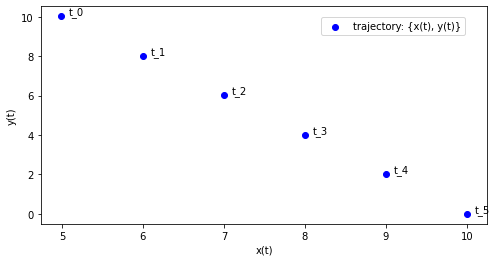

In [266]:
log(xt, yt, xlabel='x(t)', ylabel='y(t)')

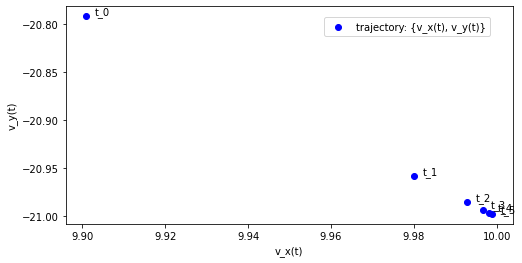

In [267]:
log(vxt, vyt, xlabel='v_x(t)', ylabel='v_y(t)', dx=0.002, dy=0.002)

Visualize the components of the $ K $ matrix below

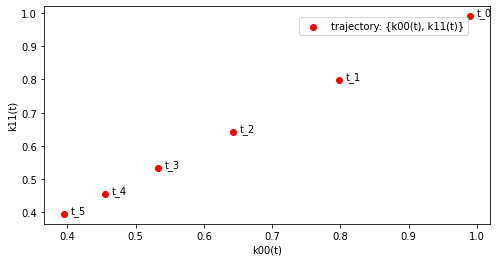

In [268]:
log(k00t, k11t, xlabel='k00(t)', ylabel='k11(t)', color='red', dx=0.01, dy=0.002)

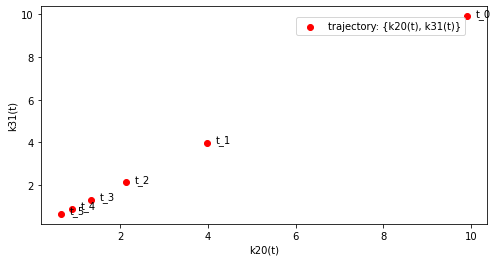

In [269]:
log(k20t, k31t, xlabel='k20(t)', ylabel='k31(t)', color='red', dx=0.2, dy=0.01)

## Second experiment

In [271]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [272]:
x_log, k_log = kalman_filter(x, E)
xt = [x[0] for x in x_log]
yt = [x[1] for x in x_log]
vxt = [x[2] for x in x_log]
vyt = [x[3] for x in x_log]
k00t = [k[0][0] for k in k_log]
k11t = [k[1][1] for k in k_log]
k20t = [k[2][0] for k in k_log]
k31t = [k[3][1] for k in k_log]

[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

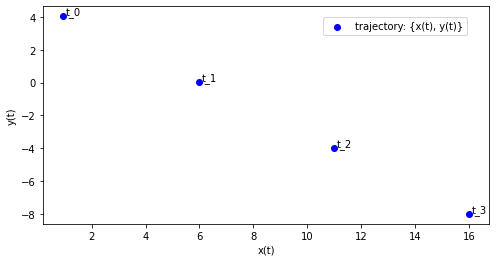

In [273]:
log(xt, yt, xlabel='x(t)', ylabel='y(t)')

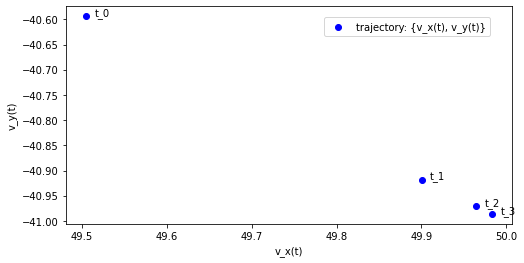

In [274]:
log(vxt, vyt, xlabel='v_x(t)', ylabel='v_y(t)', dx=0.01, dy=0.002)

Visualize the components of the $ K $ matrix below

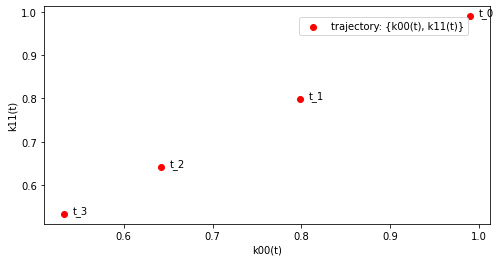

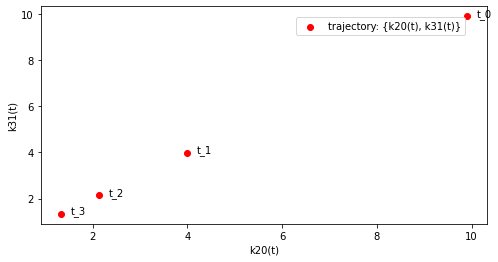

In [275]:
log(k00t, k11t, xlabel='k00(t)', ylabel='k11(t)', color='red', dx=0.01, dy=0.002)
log(k20t, k31t, xlabel='k20(t)', ylabel='k31(t)', color='red', dx=0.2, dy=0.01)

## Third Experiment

In [276]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [277]:
x_log, k_log = kalman_filter(x, E)
xt = [x[0] for x in x_log]
yt = [x[1] for x in x_log]
vxt = [x[2] for x in x_log]
vyt = [x[3] for x in x_log]
k00t = [k[0][0] for k in k_log]
k11t = [k[1][1] for k in k_log]
k20t = [k[2][0] for k in k_log]
k31t = [k[3][1] for k in k_log]

[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

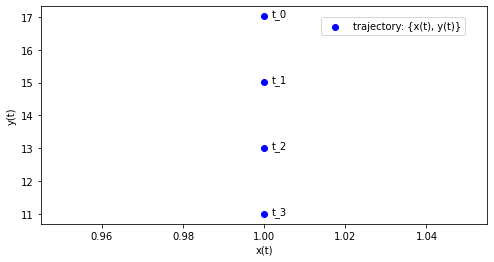

In [278]:
log(xt, yt, xlabel='x(t)', ylabel='y(t)', dx=0.002, dy=0.001)

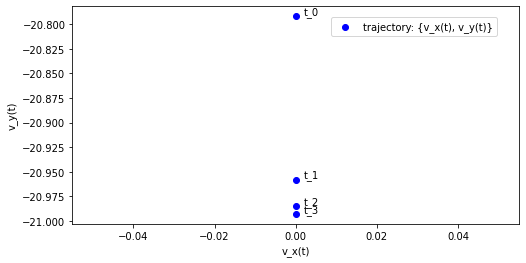

In [279]:
log(vxt, vyt, xlabel='v_x(t)', ylabel='v_y(t)', dx=0.002, dy=0.002)

Visualize the components of the $ K $ matrix below

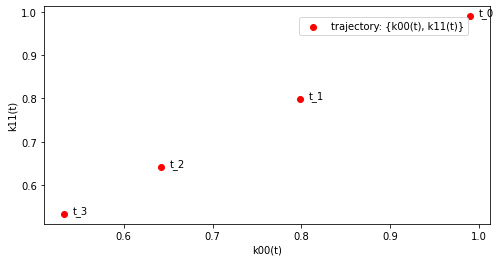

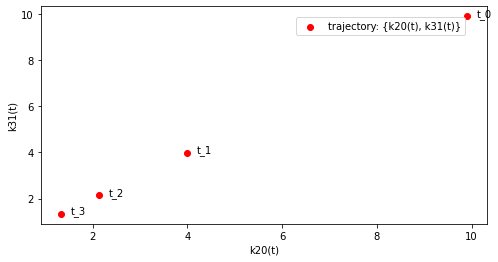

In [280]:
log(k00t, k11t, xlabel='k00(t)', ylabel='k11(t)', color='red', dx=0.01, dy=0.002)
log(k20t, k31t, xlabel='k20(t)', ylabel='k31(t)', color='red', dx=0.2, dy=0.01)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

> What does the dynamics of changes in K components say?

Обратимся к формуле, по которой мы обновляем финальное положение в конце калмановской итерации:

$$x_{t+1} = \hat{x}_t + K (z_t - H \hat{x}_t)$$

Чем больше значение компонент K, тем более весомый вклад в финальную оценку вносит расхождению между полученным предсказанием и измерениями. В экспериментах мы наблюдаем быстрое убывание компонент K, что соответствует росту уверенности нашей модели в предсказаниях.

> How much does the velocity uncertainty decrease as a result of each experiment?

В качестве начального приближения модель получает матрицу ковариаций соответствующую высокой степени неопределенности по переменным скоростей (diag[0, 0, 1000, 1000]). Но уже через несколько итераций во всех экспериментах диагональные компоненты E, соответствующие скоростям, уменьшаются с 1000 до ~0.1, т.е степень неопределенности многократно снижается, тк мы работаем с простейшей детерминированной моделью внешней среды. Также интересно отметить, что в матрице E становятся ненулевыми компонентны, отвечающие за дисперсию координатных переменных и ковариаций координатных переменных и скоростных переменных, поскольку в начальном приближении эти компоненты были нулевыми, что слишком оптимистично для стохастического процесса (измерения имеют постоянныю ковариацию R). Если посмотреть на графики, то видно что скорости быстро сходятся к постоянным значениям, что соответствует модели движения и детерминированной среде.